#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scr.code as scd

#### Read in clean data

In [2]:
df = pd.read_csv("Data/AviationDataClean.csv")

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_55099/1554552751.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/AviationDataClean.csv")


In [3]:
df = df.dropna(subset='Model')

In [4]:
df['Make_Model'] = df[['Make', 'Model']].apply(lambda x: '-'.join(x), axis=1)

#### Survive Vs. Make Visualization

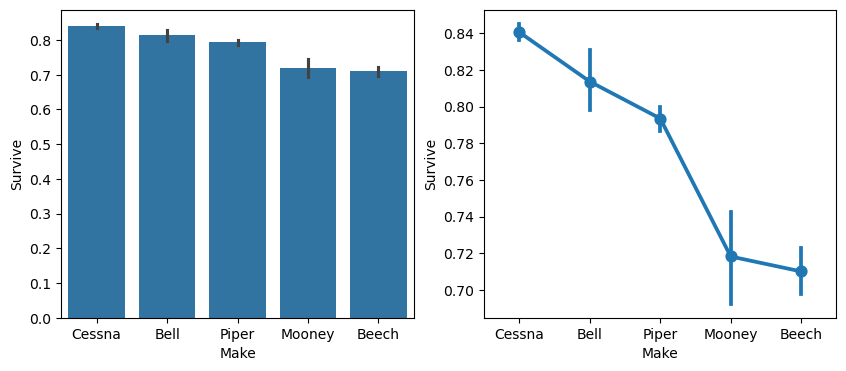

In [5]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

sns.barplot(data=df, x='Make', y = 'Survive', ax = ax[0], order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index)
sns.pointplot(data=df, x='Make', y = 'Survive', order=df[["Make","Survive"]].groupby("Make").mean().sort_values("Survive",ascending=False).index, ax = ax[1])

fig.savefig("Images/SurviveMake")

## Fraction Fatal & Uninjured vs Make: Substantial Damage

In [6]:
df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    37681
Destroyed      10464
Minor            222
Unknown           34
Name: count, dtype: int64

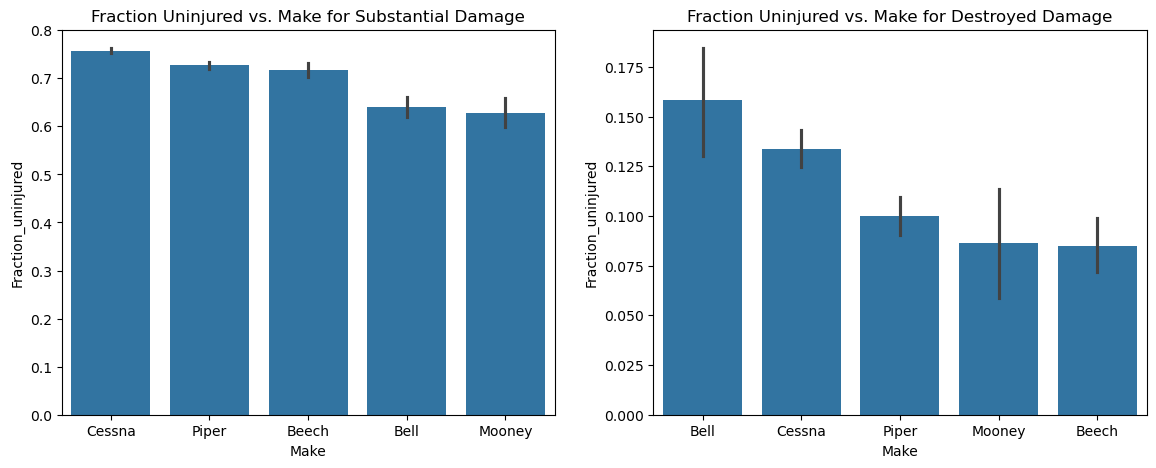

In [7]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[0])
ax[0].set_title("Fraction Uninjured vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_uninjured"]].groupby("Make").mean().sort_values(by="Fraction_uninjured",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_uninjured',order=order, ax=ax[1])
ax[1].set_title("Fraction Uninjured vs. Make for Destroyed Damage")

fig.savefig("Images/FracUninuredMake")

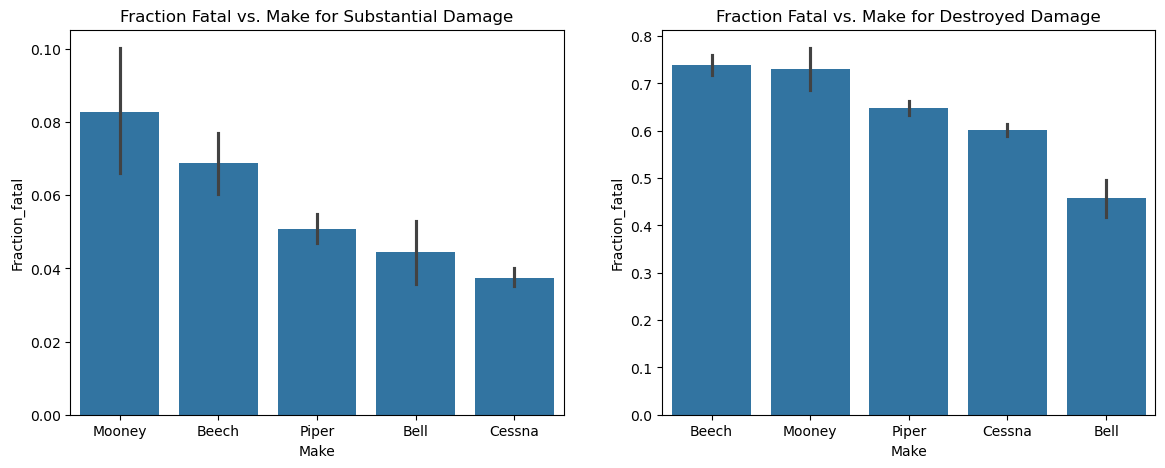

In [8]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

df_substantial = df[df["Aircraft.damage"] == "Substantial"]
df_destroyed = df[df["Aircraft.damage"] == "Destroyed"]

order = df_substantial[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_substantial, x='Make', y = 'Fraction_fatal',order=order, ax=ax[0])
ax[0].set_title("Fraction Fatal vs. Make for Substantial Damage")

order = df_destroyed[["Make","Fraction_fatal"]].groupby("Make").mean().sort_values(by="Fraction_fatal",ascending=False).index
sns.barplot(data=df_destroyed, x='Make', y = 'Fraction_fatal',order=order, ax=ax[1])
ax[1].set_title("Fraction Fatal vs. Make for Destroyed Damage")

fig.savefig("Images/FracFatalMake")

## Broad Phase of Flight vs Fraction Fatal

In [9]:
phases_flight = df["Broad.phase.of.flight"].value_counts().index[:-2]
df_phases = df[df["Broad.phase.of.flight"].map(lambda x: x in phases_flight)]
df_phases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37708 entries, 1 to 38302
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              37708 non-null  int64  
 1   Event.Id                37708 non-null  object 
 2   Investigation.Type      37708 non-null  object 
 3   Accident.Number         37708 non-null  object 
 4   Event.Date              37708 non-null  object 
 5   Location                37704 non-null  object 
 6   Country                 37574 non-null  object 
 7   Latitude                6237 non-null   object 
 8   Longitude               6236 non-null   object 
 9   Airport.Code            22405 non-null  object 
 10  Airport.Name            23895 non-null  object 
 11  Injury.Severity         37708 non-null  object 
 12  Aircraft.damage         37566 non-null  object 
 13  Aircraft.Category       4423 non-null   object 
 14  Registration.Number     37707 non-null  obj

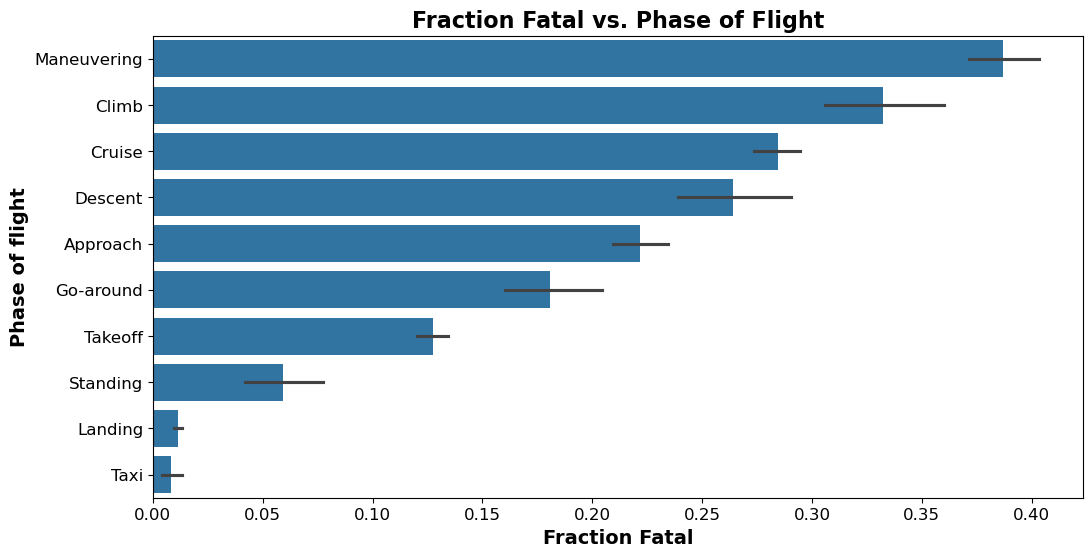

In [10]:
fig, ax = plt.subplots(figsize= (12,6))

order = df_phases[["Broad.phase.of.flight","Fraction_fatal"]].groupby("Broad.phase.of.flight").mean().sort_values(by="Fraction_fatal",ascending=False).index

sns.barplot(data=df_phases, y='Broad.phase.of.flight', x = 'Fraction_fatal', order=order, ax=ax)
ax.set_title("Fraction Fatal vs. Phase of Flight", fontsize=16, fontweight = 'bold')

ax.tick_params(labelsize=12)
ax.set_xlabel('Fraction Fatal', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/PhaseOfFlightFatality")


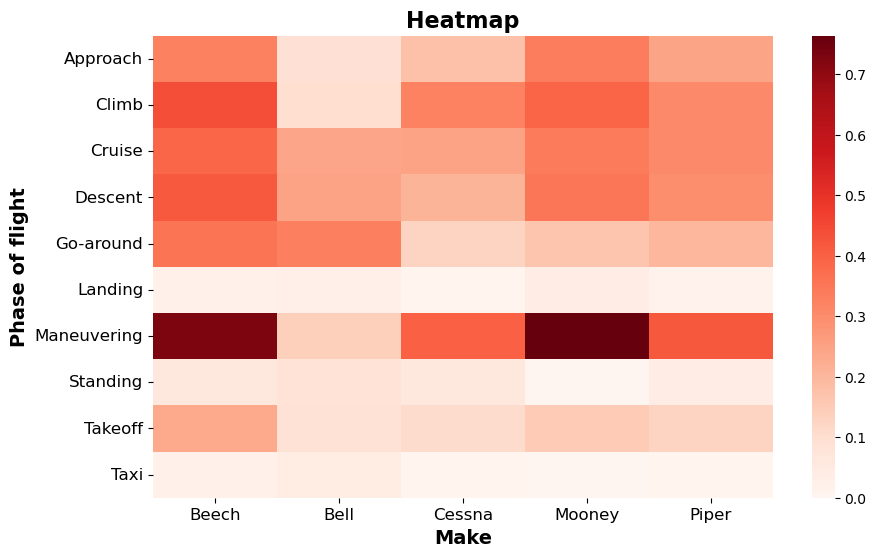

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

#sns.set_context('paper')

table = pd.pivot_table(df_phases, index=['Make'],columns=['Broad.phase.of.flight'], values='Fraction_fatal').T
sns.heatmap(table, cmap="Reds", ax=ax)
ax.set_title('Heatmap', fontsize=16, fontweight = 'bold')
ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/Fatality_Make_Phases", bbox_inches = 'tight')

## Broad Phase of Flight vs Fraction Unijured ?

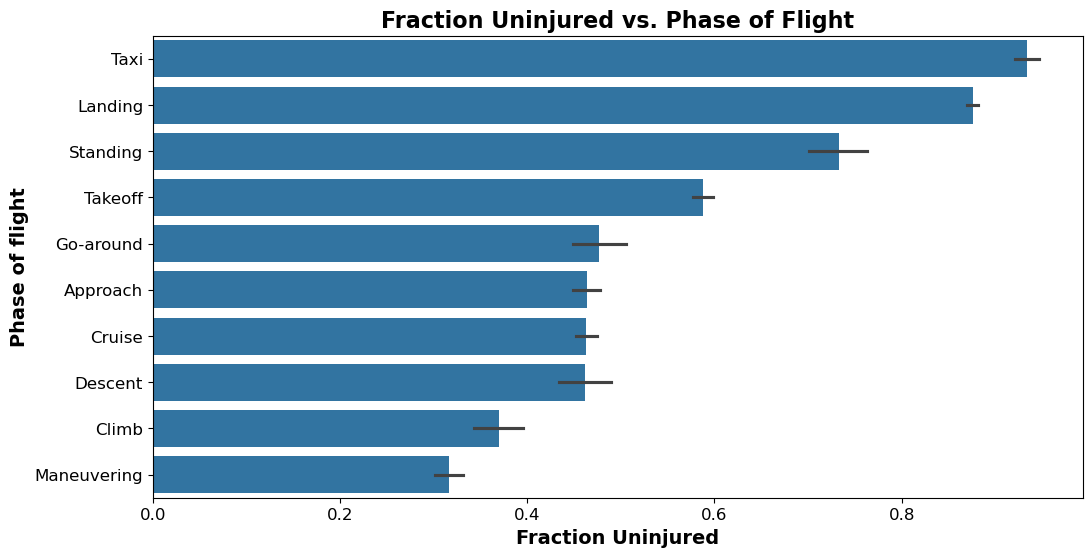

In [12]:
fig, ax = plt.subplots(figsize= (12,6))

order = df_phases[["Broad.phase.of.flight","Fraction_uninjured"]].groupby("Broad.phase.of.flight").mean().sort_values(by="Fraction_uninjured",ascending=False).index

sns.barplot(data=df_phases, y='Broad.phase.of.flight', x = 'Fraction_uninjured', order=order, ax=ax)
ax.set_title("Fraction Uninjured vs. Phase of Flight", fontsize=16, fontweight = 'bold')

ax.tick_params(labelsize=12)
ax.set_xlabel('Fraction Uninjured', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/PhaseOfFlightUninjured")

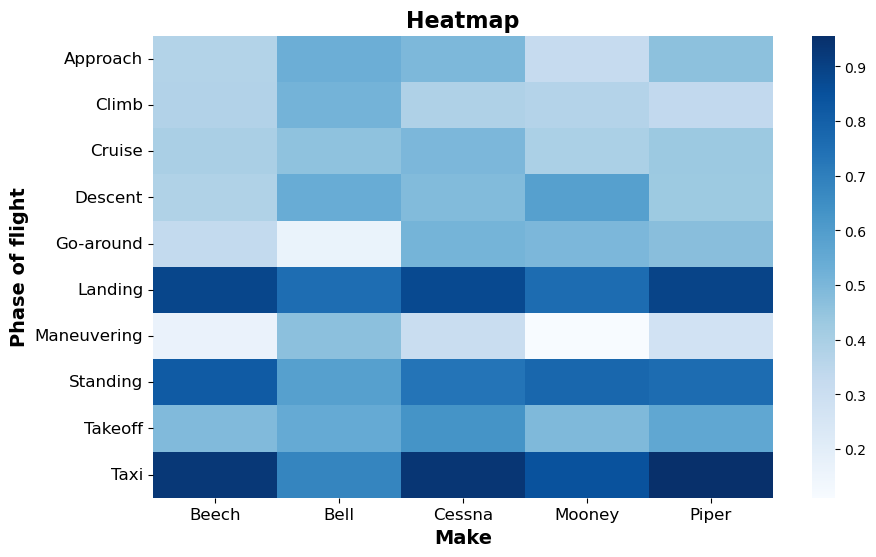

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

#sns.set_context('paper')

table = pd.pivot_table(df_phases, index=['Make'],columns=['Broad.phase.of.flight'], values='Fraction_uninjured').T
sns.heatmap(table, cmap="Blues", ax=ax)
ax.set_title('Heatmap', fontsize=16, fontweight = 'bold')
ax.tick_params(labelsize=12)
ax.set_xlabel('Make', fontweight = 'bold', fontsize=14)
ax.set_ylabel('Phase of flight', fontweight = 'bold', fontsize=14)

fig.savefig("Images/Uninjured_Make_Phases", bbox_inches = 'tight')

## Month vs Fraction Fatal

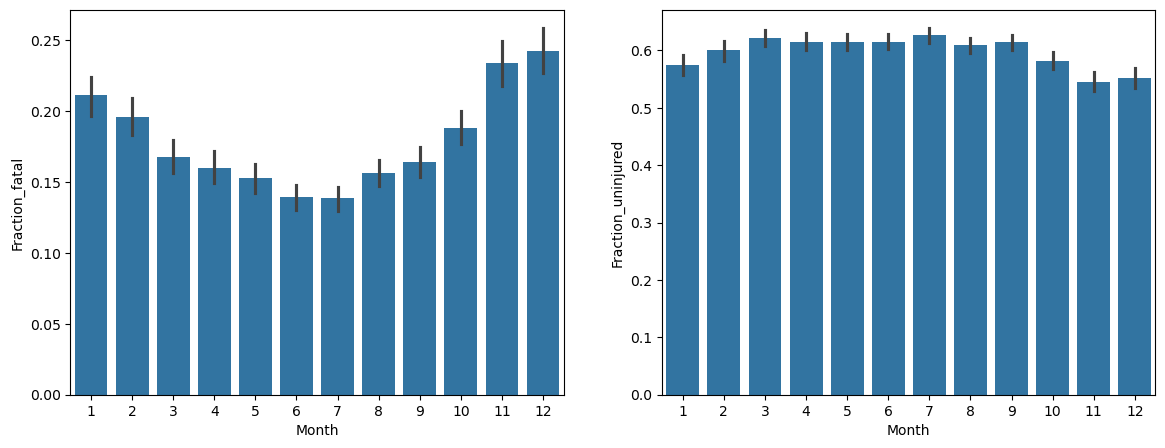

In [14]:
fig, ax = plt.subplots(1,2,figsize=[14,5])

sns.barplot(data=df, x='Month', y = 'Fraction_fatal', ax=ax[0])
sns.barplot(data=df, x='Month', y = 'Fraction_uninjured', ax=ax[1])

fig.savefig("Images/Survival_month")


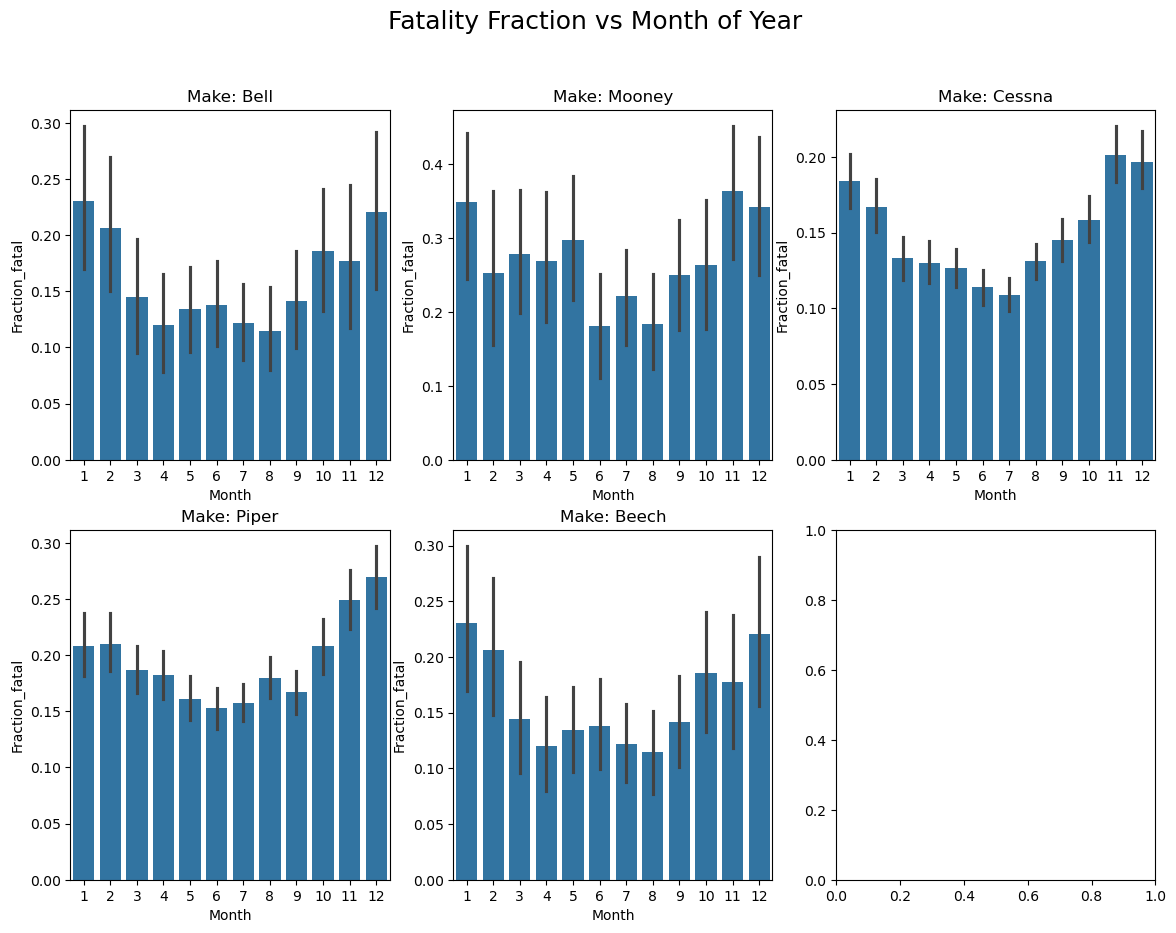

In [15]:
fig, ax = plt.subplots(2,3,figsize=[14,10])

fig.suptitle('Fatality Fraction vs Month of Year', fontsize = 18)

dfb = df[df['Make'] == 'Bell']
sns.barplot(data=dfb, x='Month', y = 'Fraction_fatal', ax=ax[0][0])
ax[0][0].set_title('Make: Bell')


dfm = df[df['Make'] == 'Mooney']
sns.barplot(data=dfm, x='Month', y = 'Fraction_fatal', ax=ax[0][1])
ax[0][1].set_title('Make: Mooney')


dfc = df[df['Make'] == 'Cessna']
sns.barplot(data=dfc, x='Month', y = 'Fraction_fatal', ax=ax[0][2])
ax[0][2].set_title('Make: Cessna')

dfp = df[df['Make'] == 'Piper']
sns.barplot(data=dfp, x='Month', y = 'Fraction_fatal', ax=ax[1][0])
ax[1][0].set_title('Make: Piper')

dfbe = df[df['Make'] == 'Beech']
sns.barplot(data=dfb, x='Month', y = 'Fraction_fatal', ax=ax[1][1])
ax[1][1].set_title('Make: Beech')

fig.savefig("Images/Make_fatal_month")


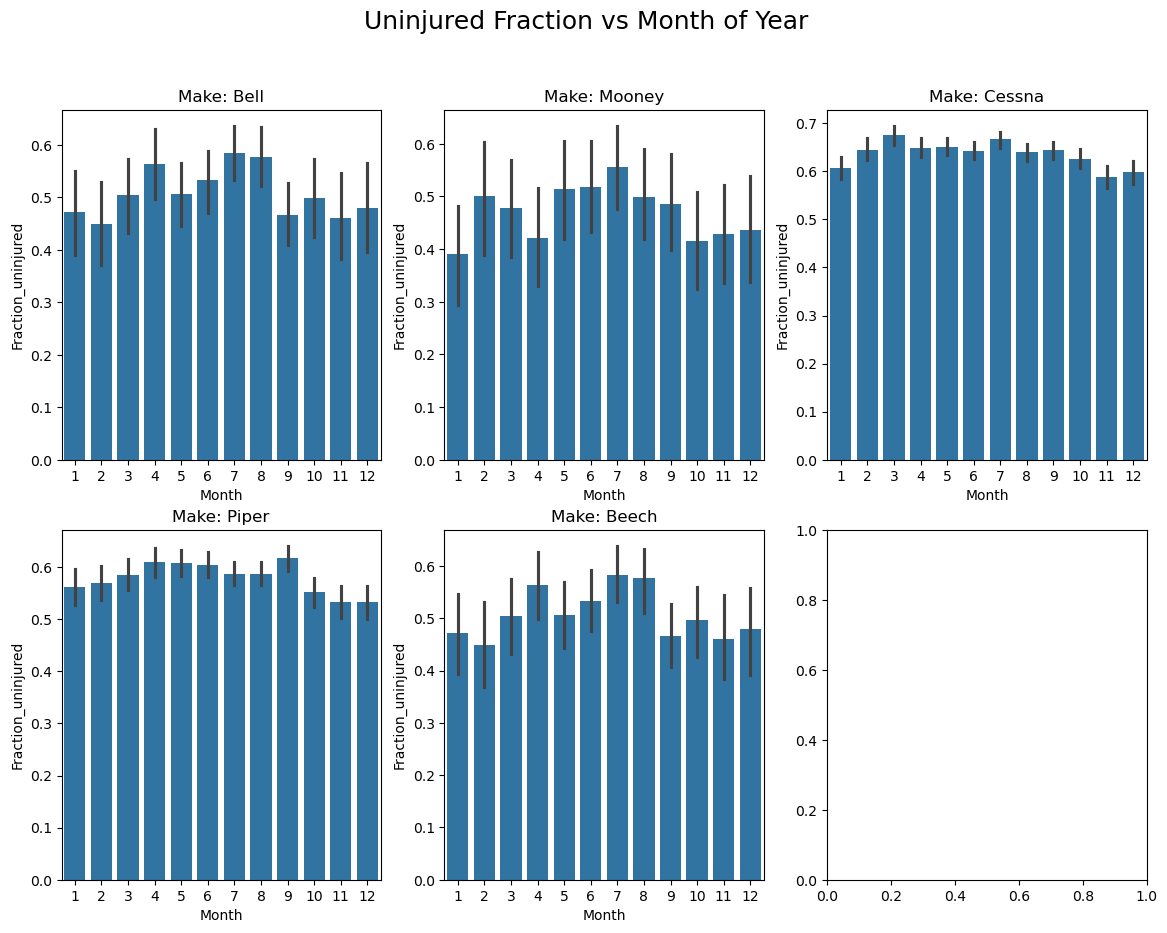

In [16]:
fig, ax = plt.subplots(2,3,figsize=[14,10])

fig.suptitle('Uninjured Fraction vs Month of Year', fontsize = 18)

dfb = df[df['Make'] == 'Bell']
sns.barplot(data=dfb, x='Month', y = 'Fraction_uninjured', ax=ax[0][0])
ax[0][0].set_title('Make: Bell')


dfm = df[df['Make'] == 'Mooney']
sns.barplot(data=dfm, x='Month', y = 'Fraction_uninjured', ax=ax[0][1])
ax[0][1].set_title('Make: Mooney')


dfc = df[df['Make'] == 'Cessna']
sns.barplot(data=dfc, x='Month', y = 'Fraction_uninjured', ax=ax[0][2])
ax[0][2].set_title('Make: Cessna')

dfp = df[df['Make'] == 'Piper']
sns.barplot(data=dfp, x='Month', y = 'Fraction_uninjured', ax=ax[1][0])
ax[1][0].set_title('Make: Piper')

dfbe = df[df['Make'] == 'Beech']
sns.barplot(data=dfb, x='Month', y = 'Fraction_uninjured', ax=ax[1][1])
ax[1][1].set_title('Make: Beech')

fig.savefig("Images/Make_uninjured_month")

In [17]:
df[['Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured', 'Make']].groupby(['Aircraft.damage', 'Make']).mean()

Total.Fatal.Injuries  Total.Serious.Injuries  \
Aircraft.damage Make                                                   
Destroyed       Beech               1.872093                0.261970   
                Bell                1.175676                0.435811   
                Cessna              1.336578                0.311723   
                Mooney              1.450980                0.218487   
                Piper               1.503256                0.353178   
Minor           Beech               0.142857                0.190476   
                Bell                0.636364                0.272727   
                Cessna              0.224806                0.178295   
                Mooney              0.500000                0.500000   
                Piper               0.254545                0.145455   
Substantial     Beech               0.147205                0.187884   
                Bell                0.093496                0.261905   
                Cessna              0.072312                0.141929   
                Mooney              0.147864                0.177437   
                Piper               0.104113                0.166083   
Unknown         Beech               0.000000                0.000000   
                Bell                0.000000                0.000000   
                Cessna              0.157895                0.263158   
                Mooney              0.500000                0.000000   
                Piper               0.545455                0.545455   

                        Total.Uninjured  
Aircraft.damage Make                     
Destroyed       Beech          0.283174  
                Bell           0.336149  
                Cessna         0.298260  
                Mooney         0.196078  
                Piper          0.211473  
Minor           Beech          4.761905  
                Bell           2.636364  
                Cessna         2.651163  
                Mooney         2.000000  
                Piper          2.854545  
Substantial     Beech          1.747147  
                Bell           1.336237  
                Cessna         1.435603  
                Mooney         1.219058  
                Piper          1.433880  
Unknown         Beech          0.000000  
                Bell           1.000000  
                Cessna         1.421053  
                Mooney         1.000000  
                Piper          0.818182

In [18]:
df['State']=df['Location'].str.slice(-2)
df['State'].value_counts()

State
CA    4965
AK    3960
FL    3342
TX    3232
AZ    1608
      ... 
39       1
us       1
1A       1
#1       1
WN       1
Name: count, Length: 206, dtype: int64

In [19]:
dfA = df[df['Country'] == 'United States']
dfA['State']=dfA['Location'].str.slice(-2)
dfA['State'].value_counts()[:52].index

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_55099/2688380835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfA['State']=dfA['Location'].str.slice(-2)


Index(['CA', 'AK', 'FL', 'TX', 'AZ', 'CO', 'WA', 'MI', 'GA', 'IL', 'OH', 'PA',
       'NY', 'NC', 'OR', 'MO', 'WI', 'MN', 'IN', 'OK', 'ID', 'UT', 'NM', 'VA',
       'NJ', 'AR', 'MT', 'AL', 'NV', 'KS', 'TN', 'LA', 'SC', 'MA', 'MD', 'IA',
       'MS', 'WY', 'NE', 'KY', 'ME', 'CT', 'ND', 'SD', 'WV', 'HI', 'NH', 'VT',
       'RI', 'DE', 'PR', 'GM'],
      dtype='object', name='State')

In [20]:
df.groupby('State').count()

,Unnamed: 0,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,...,Broad.phase.of.flight,Report.Status,Publication.Date,Survive,total.passengers,Month,Year,Fraction_fatal,Fraction_uninjured,Make_Model
State,,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
7,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
F,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
#1,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
#4,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
we,1,1,1,1,1,1,1,1,1,0,...,0,0,0,1,1,1,1,1,1,1
"x,",1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
"y,",1,1,1,1,1,1,1,1,1,0,...,0,0,1,1,1,1,1,1,1,1


----------------------

##### Fraction Fatal

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


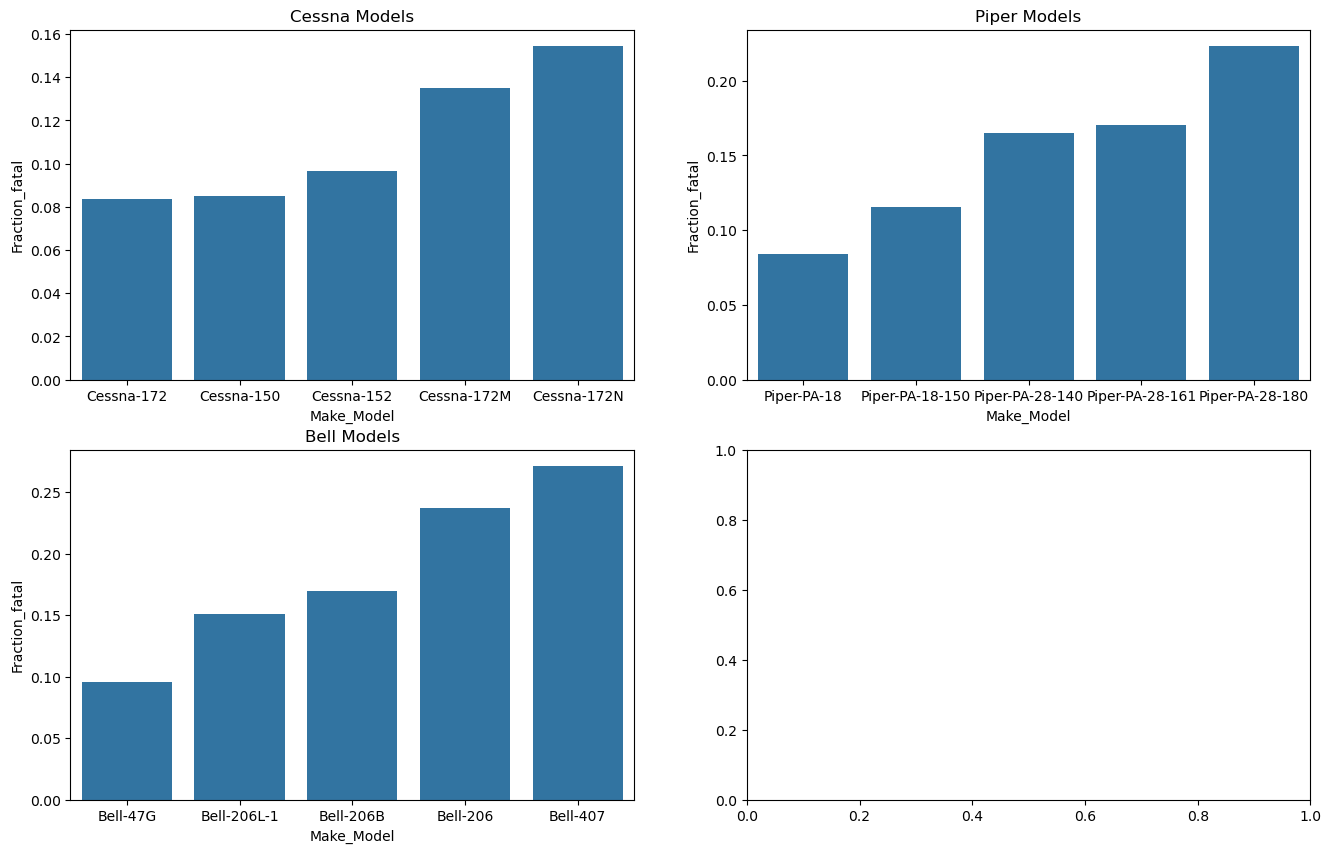

In [21]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('General Fraction Fatal', fontsize = 18)

scd.hi(df, 'Cessna', 'Fraction_fatal', ax[0][0])
scd.hi(df, 'Piper', 'Fraction_fatal', ax[0][1])
scd.hi(df, 'Bell', 'Fraction_fatal', ax[1][0])

fig.savefig("Images/AllModelFatal")

##### Fraction Uninjured

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


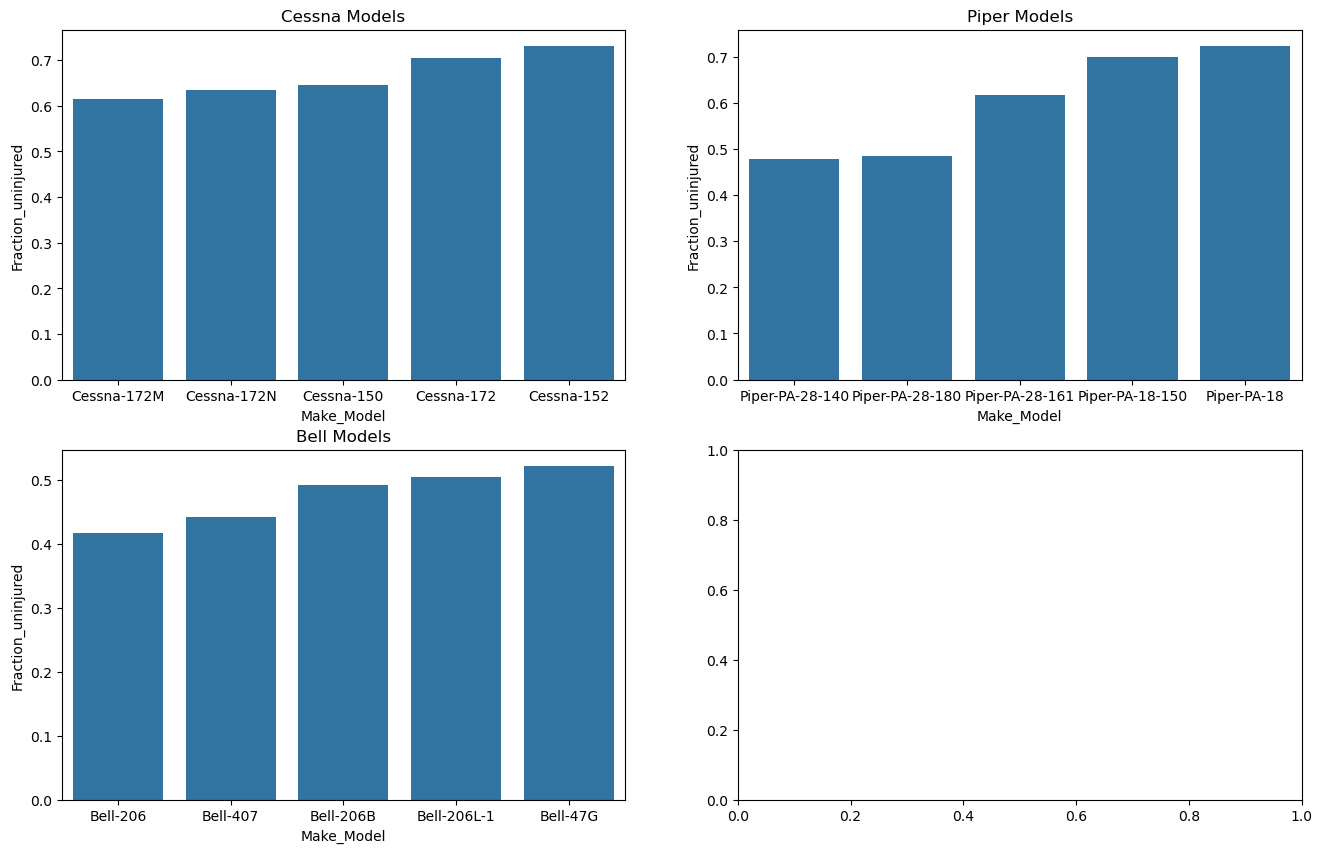

In [22]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('General Fraction Uninjured', fontsize = 18)

scd.hi(df, 'Cessna', 'Fraction_uninjured', ax[0][0])
scd.hi(df, 'Piper', 'Fraction_uninjured', ax[0][1])
scd.hi(df, 'Bell', 'Fraction_uninjured', ax[1][0])

fig.savefig("Images/AllModelsUninjured")

-------------------

In [23]:
df['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    37681
Destroyed      10464
Minor            222
Unknown           34
Name: count, dtype: int64

##### Substantial

In [24]:
dfS = df[df['Aircraft.damage'] == 'Substantial']

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


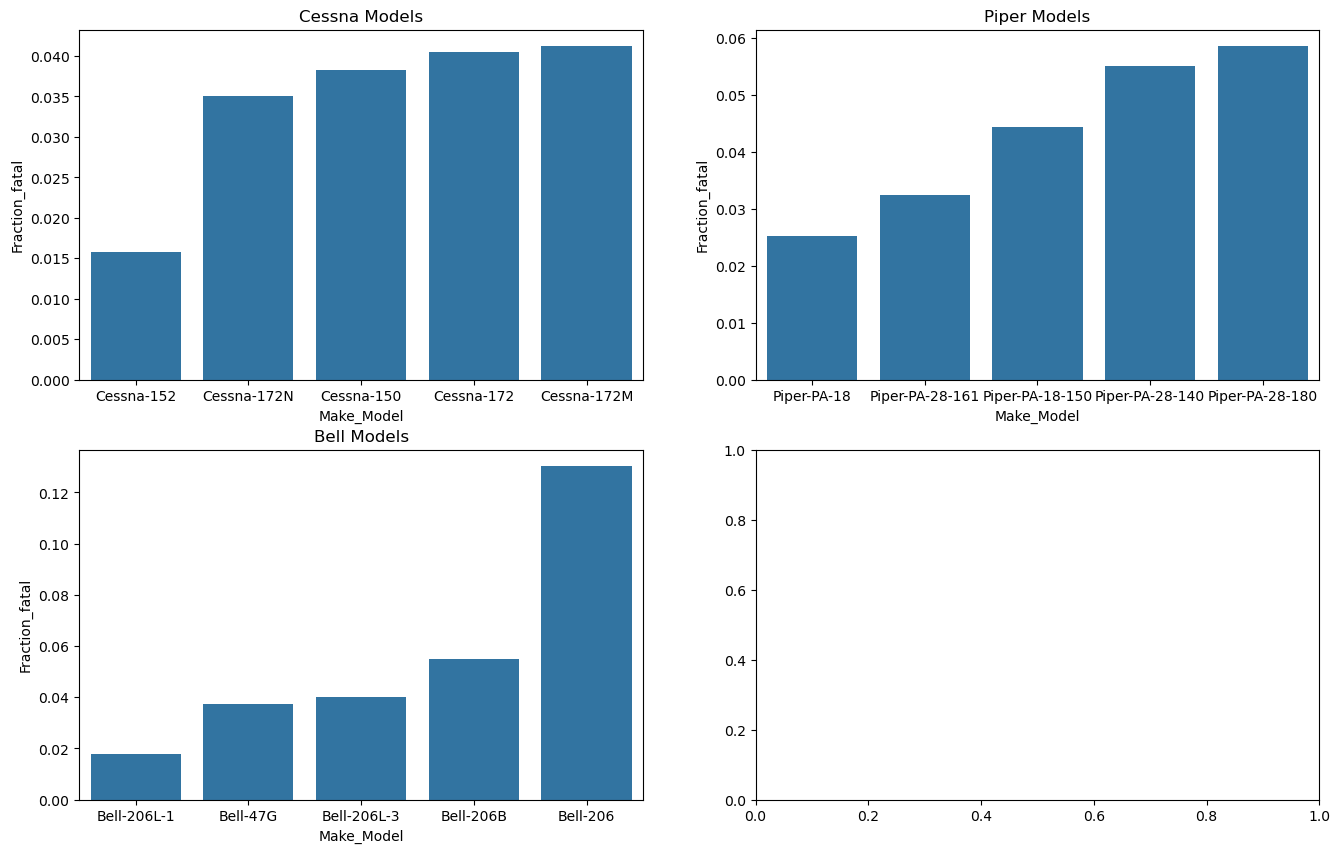

In [25]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Substantial Damage per Make-Model in Fatal', fontsize = 18)

scd.hi(dfS, 'Cessna', 'Fraction_fatal', ax[0][0])
scd.hi(dfS, 'Piper', 'Fraction_fatal', ax[0][1])
scd.hi(dfS, 'Bell', 'Fraction_fatal', ax[1][0])

fig.savefig("Images/ModelFatalSubstantial")

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


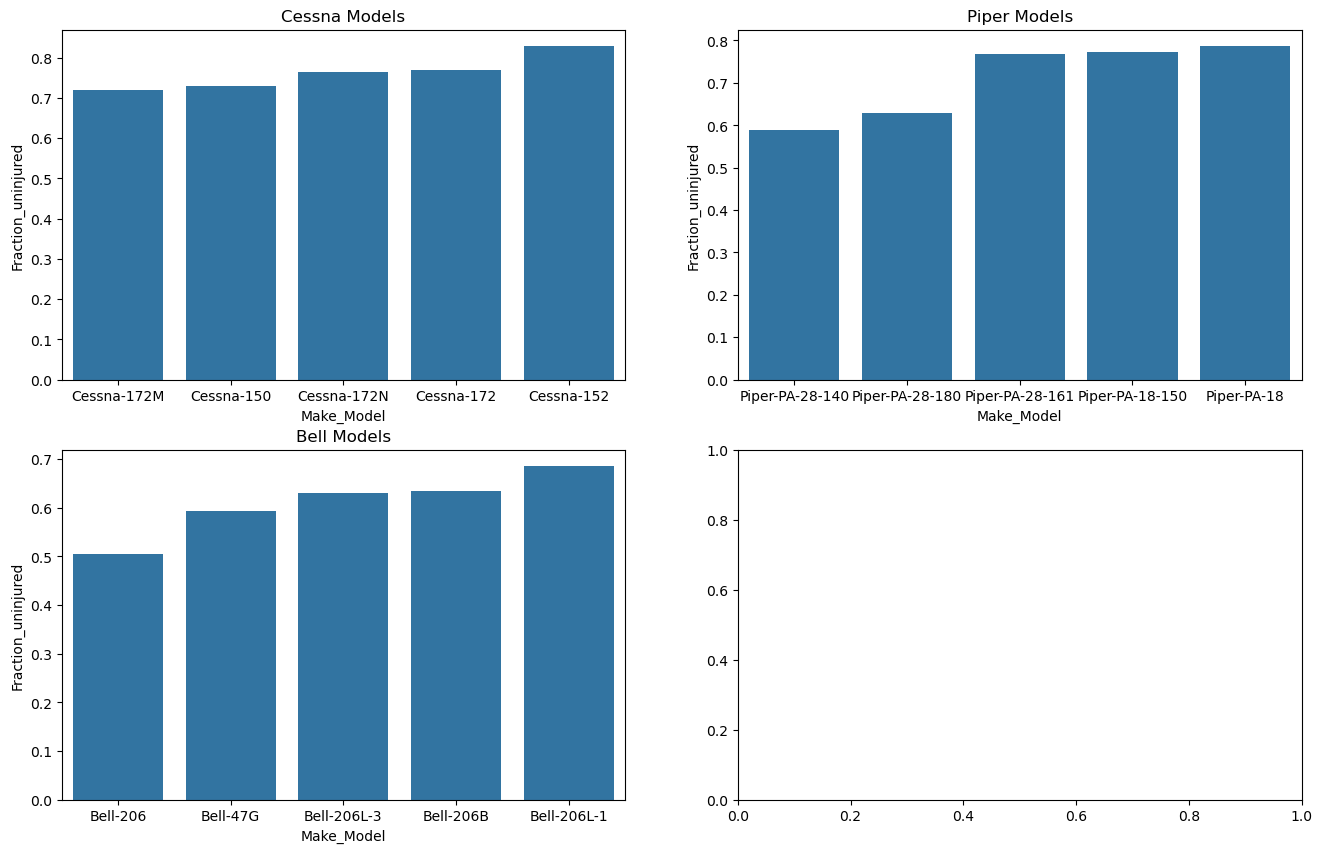

In [26]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Substantial Damage per Make-Model in Uninjured', fontsize = 18)

scd.hi(dfS, 'Cessna', 'Fraction_uninjured', ax[0][0])
scd.hi(dfS, 'Piper', 'Fraction_uninjured', ax[0][1])
scd.hi(dfS, 'Bell', 'Fraction_uninjured', ax[1][0])

fig.savefig("Images/ModelUninjuredSubstatial")

------------------------------

#### Destroyed

In [27]:
dfD = df[df['Aircraft.damage'] == 'Destroyed']

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


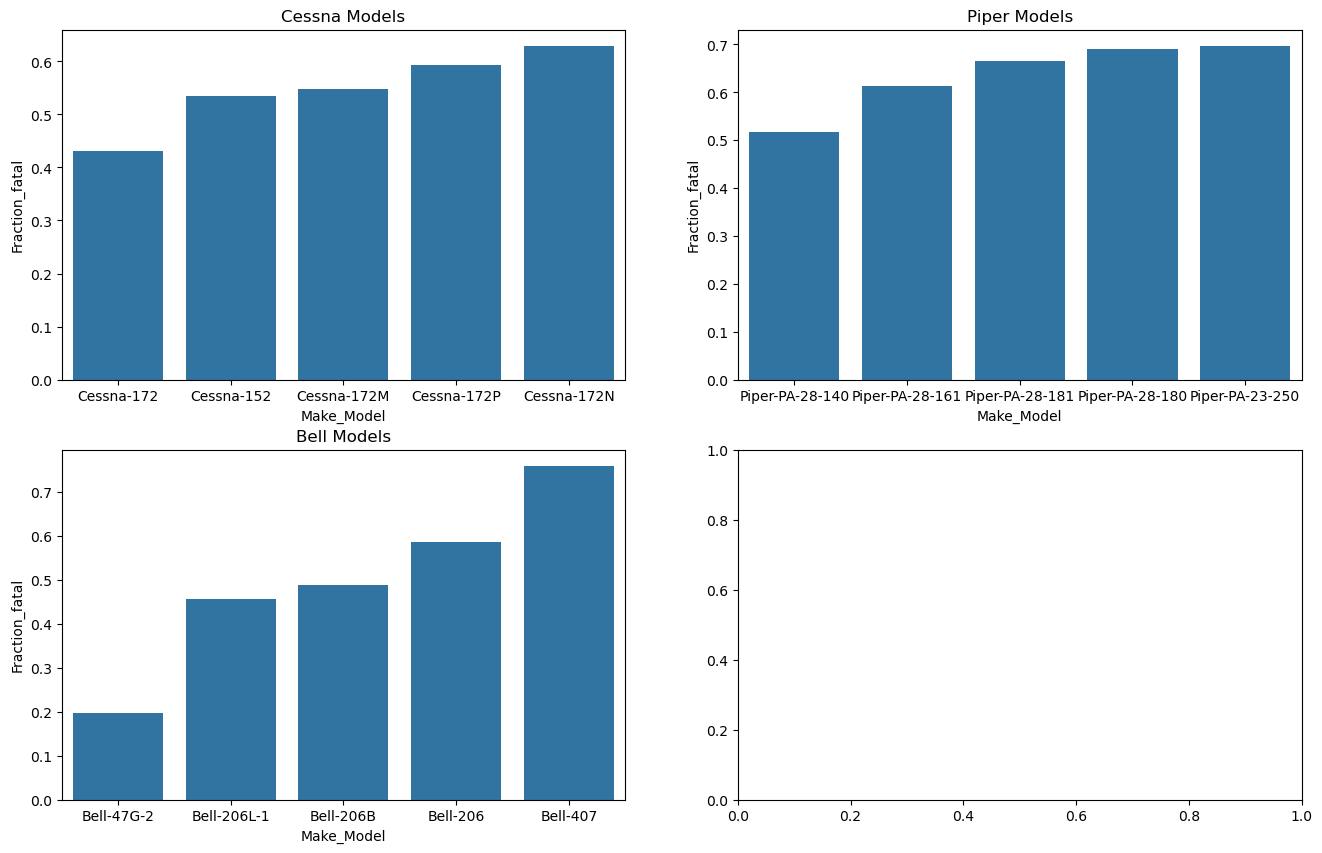

In [28]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Destroyed per Make-Model in Fatal', fontsize = 18)

scd.hi(dfD, 'Cessna', 'Fraction_fatal', ax[0][0])
scd.hi(dfD, 'Piper', 'Fraction_fatal', ax[0][1])
scd.hi(dfD, 'Bell', 'Fraction_fatal', ax[1][0])

fig.savefig("Images/ModelDestroyedFatal")

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)
/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(ave_fraction.loc[x])) for x in top_five]).sort_values(by=1)


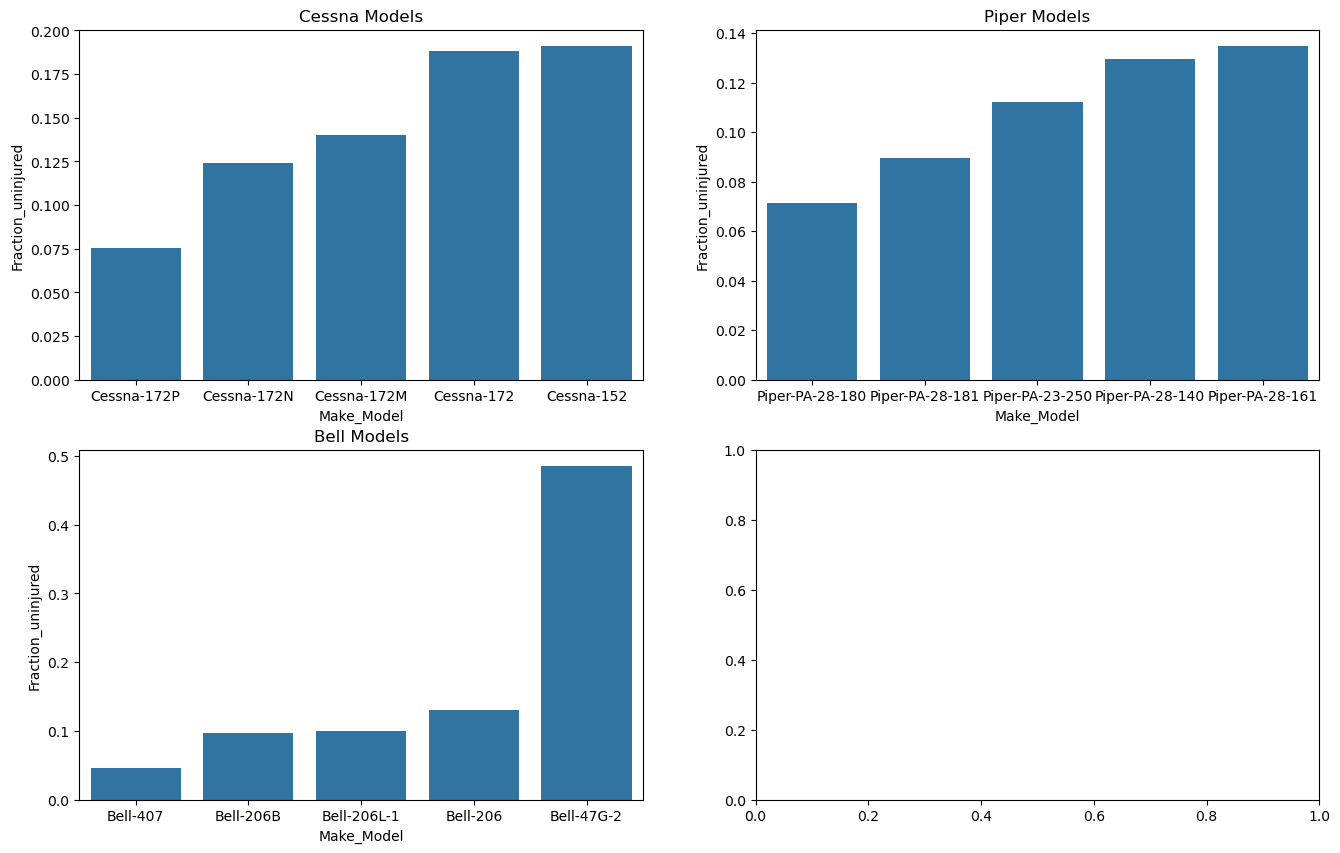

In [29]:
fig, ax = plt.subplots(2,2, figsize = (16,10))

fig.suptitle('Destroyed per Make-Model in Uninjured', fontsize = 18)

scd.hi(dfD, 'Cessna', 'Fraction_uninjured', ax[0][0])
scd.hi(dfD, 'Piper', 'Fraction_uninjured', ax[0][1])
scd.hi(dfD, 'Bell', 'Fraction_uninjured', ax[1][0])

fig.savefig("Images/ModelsDestroyedUninjured")